# Project: Data analysis of No-show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In thsis project, I will be using the dataset collected from 100K hospital appointments in Brazil. Hence, I will be investigating and analyzing the important factors that we can use to predict whether a patient will show up for his/her scheduled hospital appointment or not. 

Here, I will be exploring the dataset to set a plan for data wrangling, analysis and visualization. Through using different exploring commands in Pandas, this dataset included information for 110527 patients distributed across 14 columns that pose the metadata for each patient. The dataset will be checked for duplicates, missing values then filtered to include the most important features to be included in the analysis. Next step, further cleaning will be performed if needed such as renaming columns and changing datatypes of specific columns in order to use them in the downstream analyses.

In this analsis, I posed 6 main research questions to investigate:

### Research Question 1 (what is the percentage of patients who committed to their appointments versus those who did not?)

### Research Question 2. investigate whether the age factor is correlated to showing up on time based on the scheduled appointments or not.

### Research Question 3. investigate whether the gender factor is associated with showing up on time or not.

### Research question 4. is to investigate whether some social habits such as drinking alcohol is associated with the degree of commitment to hospital appointments or not.

### Research question 5.  investigate the correlation between having a chronic disease such as hypertension, and diabetes and showing up on time.

### Research question 6. investigate whether the handicapped patients are more likely to commit to their appointments or not.

### Research question 7. check whether sms-received affect showing up at the scheduled appointments.

### Research question 8. investigate whether patients who show up on time are on a welfare health program or not.

### Research question 9. check which week day the patients do not commit to their hospital appointments.

In [104]:
#import libraries that will be used in the analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [105]:
#check the working directory
os.getcwd()

'/home/workspace'

In [106]:
ls

Investigate_a_Dataset.ipynb  noshowappointments-kagglev2-may-2016.csv


<a id='wrangling'></a>
## Data Wrangling

Here, I will upload the data file, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

## Gather data 
- I download the dataset manually from the provided link, and uploaded it to the workspace, then read it as pandas df

In [107]:
#reading noshowappointments-kagglev2-m ay-2016.csv in pandas dataframe 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## Exploring the dataset

In [108]:
##exploring the file content (top 5 entries)
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [109]:
# Display the last 5 entries
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [110]:
#explore how many data entries and columns
df.shape

(110527, 14)

In [111]:
#check for non-values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [112]:
#check for duplicates
df.duplicated().any()

False

In [113]:
#check the basic structural information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


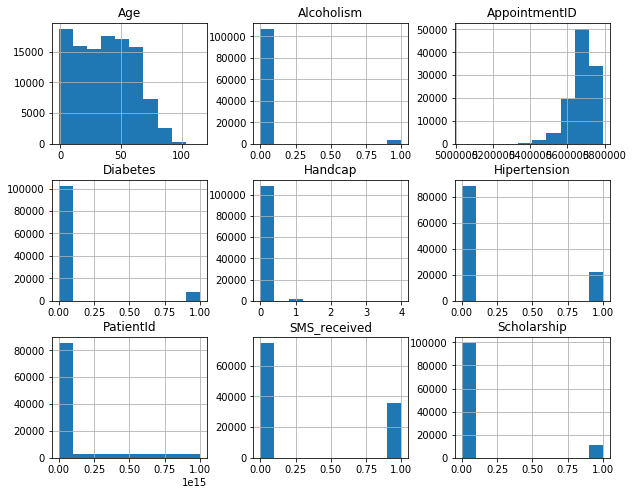

In [114]:
#visualize the data structure using histograms
df.hist(figsize=(10,8));

In [115]:
# Check number of values in the gender column 
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [116]:
# Check number of values in the age column 
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

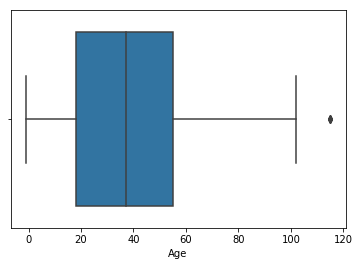

In [117]:
#check the distrubution of patients' age
sns.boxplot(df.Age)
plt.show()

In [118]:
# Check number of values in the No-show column 
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [119]:
# Check number of values in the handcap column 
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [120]:
# Check number of values in the Alcoholism column 
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [121]:
# Check number of values in the Diabetes column 
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [122]:
# Check number of values in the Diabetes column 
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [123]:
# Check number of values in the Neighbourhod column
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [124]:
# Check number of values in the scholarship column
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [125]:
# Check number of values in the sms_received column
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [127]:
#summary of basic statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

- Based on the above exploratory steps, we will be cleaning the data for analysis

### Assessing data
- The original dataset contains data for 110527 patients including 14 pieces of metadata information
- After filtering ID columns, we will have 12 columns
- There is no null values in the dataset
- There is no duplicates in the dataset

We found the following quality issues:

1- Columns' names need to be corrected and formatted in a consistent way.e.g., ScheduleDay, AppointmentDay, Hipertension, Handcap, No-show should be renamed with proper names.

2- Some patients have either zero or negative value of age. So, we will replace these illogical values with the average age.

3- dtype of some columns need to be changed to the proper dtype for downstream analysis and visualization. For example, columns, No_show, Alcoholism, Hypertension, Diabetes, Scholarship, SMS_received  has 0 or 1 value, so we will change their dtype into boolean, hence we could use the column in grouping procedures.

5- Column Handicap has 5 levels (0, 1,2,3,4), where zero means not handicapped and the other numbers refer to different levels of disabilities. So, we will replace them with False for (0), then level1, 2, 3,4 will be True.

## Cleaning data

In [128]:
## We are interested in all columns except for patientId and appointmentId, so let us drop them off
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace = True)

In [129]:
#confirm changes to the dataframe
df.shape

(110527, 12)

In [130]:
# Rename columns ScheduledDay, AppointmentDay, Hipertension, Handcap, No-show with the proper names as follows:
df.rename(columns = {'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [131]:
#confirm change of columns' names
df.head(2)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [132]:
#Fix the age issue by replacing either zero or negative values with the mean age to them after being calculated
AgeMean = df['Age'].mean()
df[df['Age'] <= 0] = AgeMean

In [133]:
#confirm change in Age column
df['Age'].value_counts()

37.088874     3540
1.000000      2273
52.000000     1746
49.000000     1652
53.000000     1651
56.000000     1635
38.000000     1629
59.000000     1624
2.000000      1618
50.000000     1613
57.000000     1603
36.000000     1580
51.000000     1567
19.000000     1545
39.000000     1536
37.000000     1533
54.000000     1530
34.000000     1526
33.000000     1524
6.000000      1521
30.000000     1521
3.000000      1513
17.000000     1509
32.000000     1505
5.000000      1489
44.000000     1487
18.000000     1487
58.000000     1469
46.000000     1460
45.000000     1453
              ... 
72.000000      615
74.000000      602
76.000000      571
75.000000      544
78.000000      541
77.000000      527
80.000000      511
81.000000      434
82.000000      392
79.000000      390
84.000000      311
83.000000      280
85.000000      275
86.000000      260
87.000000      184
89.000000      173
88.000000      126
90.000000      109
92.000000       86
91.000000       66
93.000000       53
94.000000   

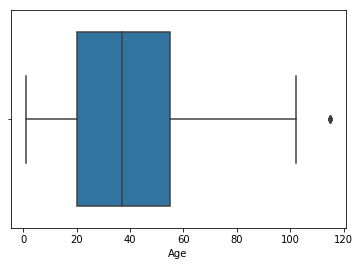

In [134]:
# check the distrubution of age
sns.boxplot(df.Age)
plt.show()

In [135]:
#Change the dtype of Scheduled_Day column to datetime
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender             110527 non-null object
Scheduled_Day      110527 non-null datetime64[ns]
Appointment_Day    110527 non-null object
Age                110527 non-null float64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null float64
Hypertension       110527 non-null float64
Diabetes           110527 non-null float64
Alcoholism         110527 non-null float64
Handicap           110527 non-null float64
SMS_received       110527 non-null float64
No_show            110527 non-null object
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 10.1+ MB


In [136]:
# Strip time from schedule_Day, and ignore time portion within the date since it is not provided
df['Scheduled_Day'] = df['Scheduled_Day'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null float64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null float64
Hypertension       110527 non-null float64
Diabetes           110527 non-null float64
Alcoholism         110527 non-null float64
Handicap           110527 non-null float64
SMS_received       110527 non-null float64
No_show            110527 non-null object
dtypes: float64(7), object(5)
memory usage: 10.1+ MB


In [137]:
##Change the dtype of Appointment_Day column to datetime
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null float64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null float64
Hypertension       110527 non-null float64
Diabetes           110527 non-null float64
Alcoholism         110527 non-null float64
Handicap           110527 non-null float64
SMS_received       110527 non-null float64
No_show            110527 non-null object
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 10.1+ MB


In [138]:
## Strip time from Appointment_Day, and ignore time portion within the date since it is not provided
df['Appointment_Day'] = df['Appointment_Day'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null float64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null float64
Hypertension       110527 non-null float64
Diabetes           110527 non-null float64
Alcoholism         110527 non-null float64
Handicap           110527 non-null float64
SMS_received       110527 non-null float64
No_show            110527 non-null object
dtypes: float64(7), object(5)
memory usage: 10.1+ MB


In [139]:
#Change the dtype of Day columns into datetime for further analysis
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
#Change date to day of week to make it clearer to the reader
df['Scheduled_dw'] = df['Scheduled_Day'].dt.weekday_name
df['Appointment_dw'] = df['Appointment_Day'].dt.weekday_name
df.head(3)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_dw,Appointment_dw
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,Friday,Friday
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,Friday,Friday
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,Friday,Friday


In [140]:
#change No_show data from Yes/No to 1/0 so we can plot these data similar to other columns
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace = True)
#convert to boolean
df['No_show'] = df['No_show'].astype('bool', inplace=True)
df.head(3)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_dw,Appointment_dw
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,False,Friday,Friday
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,False,Friday,Friday
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,False,Friday,Friday


In [141]:
#check value counts for No_show
df['No_show'].value_counts()

False    85307
True     25220
Name: No_show, dtype: int64

In [142]:
#convert diabetes column into boolean
df['Diabetes'] = df['Diabetes'].astype('bool', inplace=True)
#check value counts for diabetes
df['Diabetes'].value_counts()

False    99044
True     11483
Name: Diabetes, dtype: int64

In [143]:
#convert Hypertension column into boolean
df['Hypertension'] = df['Hypertension'].astype('bool', inplace=True)
#check value counts for diabetes
df['Hypertension'].value_counts()

False    85186
True     25341
Name: Hypertension, dtype: int64

In [144]:
#convert Scholarship column into boolean
df['Scholarship'] = df['Scholarship'].astype('bool', inplace=True)
#check value counts for scholarship
df['Scholarship'].value_counts()

False    96178
True     14349
Name: Scholarship, dtype: int64

In [145]:
#convert Alcoholism column into boolean
df['Alcoholism'] = df['Alcoholism'].astype('bool', inplace=True)
#check value counts for Alcoholism
df['Alcoholism'].value_counts()

False    103627
True       6900
Name: Alcoholism, dtype: int64

In [146]:
#convert SMS_received column into boolean
df['SMS_received'] = df['SMS_received'].astype('bool', inplace=True)
#check value counts for MSM_receive
df['SMS_received'].value_counts()

False    72402
True     38125
Name: SMS_received, dtype: int64

In [149]:
#Handicap column contains 5 values indicating different levels of disability (1,2,3,4)  along with being health (0)
#let us convert them into bool, True (hanicap) /False (not-handicapped) 
df['Handicap-merge'] = df['Handicap'].astype('bool', inplace=True)
df['Handicap-merge'].value_counts()

False    104747
True       5780
Name: Handicap-merge, dtype: int64

In [150]:
#confirm changes
df.head(3)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_dw,Appointment_dw,Handicap-merge
0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,False,True,False,False,0.0,False,False,Friday,Friday,False
1,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,False,False,False,False,0.0,False,False,Friday,Friday,False
2,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,False,False,False,False,0.0,False,False,Friday,Friday,False


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the percentage of patients who committed to their appointments versus those who did not?)

In [151]:
### Research Question 1 (The percentage of patients who committed to their appointments versus those who did not come?)
# create a mask for people who showed up versus those who did not to used it in the downstream analysis
Showed = df.No_show == False
Not_showed = df.No_show == True

22.8179539841


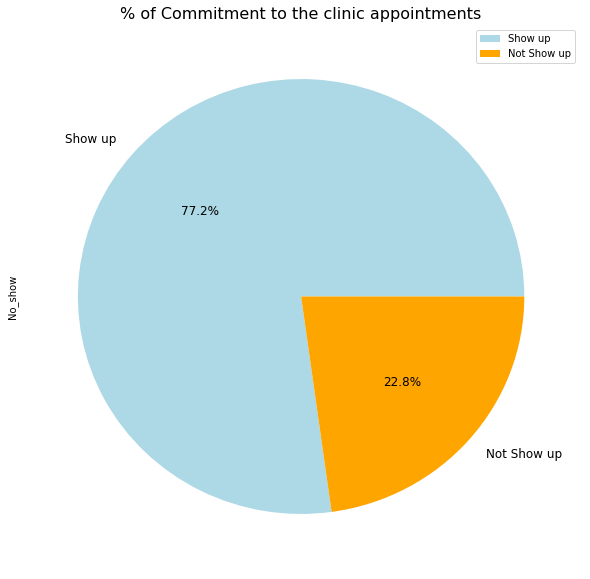

In [152]:
### Here, we will generate a pie chart showing the percentage of each group (Showed vs Not_showed)
total = df['No_show'].value_counts()
print(total[1] / total.sum() * 100)
color_set = ['lightblue', 'orange']
labels= ['Show up', 'Not Show up']
PieChart = total.plot.pie(figsize=(10,10), autopct='%1.1f%%', colors=color_set, labels=labels, fontsize = 12);
PieChart.set_title('% of Commitment to the clinic appointments', fontsize = 16);
plt.legend();



### The majority of patients show up at their appointments
77.2% of the total patients who show up at their appointments whereas 22.8% did not.


### Research Question 2. investigate whether the age factor is correlated to showing up on time based on the scheduled appointments or not.

In [153]:
#calculate the mean age of patients who showed up at their appointments
df.Age[Showed].mean()

39.075187264820002

In [154]:
#calculate the mean age of patients who did not show up at their appointments
df.Age[Not_showed].mean()

35.576154429402379

##There is no big difference between the means of the two age groups

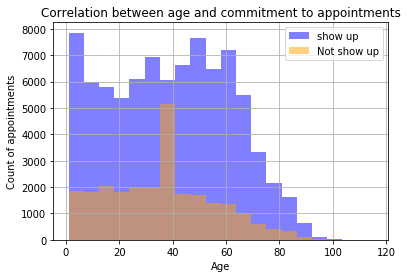

In [155]:
 #plot histogram that shows the correlation between age and commitiment to appointments
df.Age[Showed].hist(alpha=0.5, bins=20, color='blue', label='show up')
df.Age[Not_showed].hist(alpha=0.5, bins=20, color= 'orange', label='Not show up')
plt.title("Correlation between age and commitment to appointments")
plt.xlabel('Age')
plt.ylabel('Count of appointments')
plt.legend();

### We did not find any significant association between the age and showing up at appointments. The age of the two groups (show up and not show up) are overlapped and there is no big difference between their means. However, patients in late 30's seem not to show up more frequently.

### Research Question 3. investigate whether the gender factor is associated with showing up on time or not.

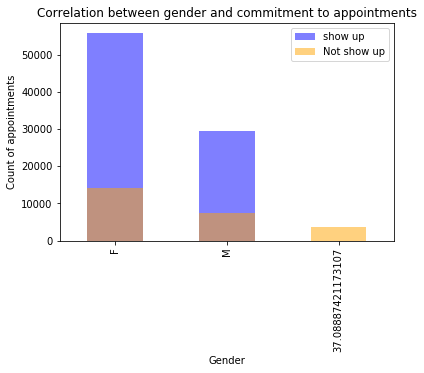

In [156]:
#plot histogram that shows the correlation between gender and commitiment to appointments
df.Gender[Showed].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='show up')
df.Gender[Not_showed].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='Not show up')
plt.title("Correlation between gender and commitment to appointments")
plt.xlabel('Gender')
plt.ylabel('Count of appointments')
plt.legend();

### From the above graph, most of patients who showed up at their appointments were females. However,  female patients constitue approximately two thirds of the total patients.

### Research question 4. is to investigate whether some social habits such as drinking alcohol is associated with the degree of commitment to hospital appointments or not.

In [159]:
#grouping patients in terms of showing up according to their habit of drinking alcohol.
df.groupby('Alcoholism').No_show.value_counts()

Alcoholism  No_show
False       False      82624
            True       21003
True        True        4217
            False       2683
Name: No_show, dtype: int64

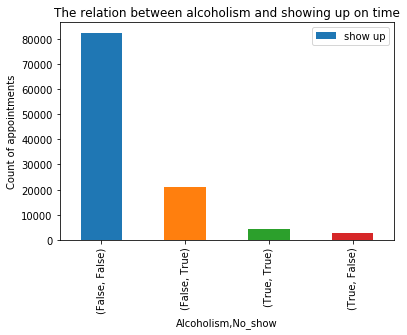

In [160]:
#visualizing patients' groups in terms of showing up according to their habit of drinking alcohol.
df.groupby('Alcoholism')['No_show'].value_counts().plot(kind='bar', label='show up')
plt.ylabel("Count of appointments")
plt.title("The relation between alcoholism and showing up on time")
plt.legend();

### This graph shows that the majority of patients who committed to their appointments do not drink alcohol. Hence, there might be an association between alcoholism and commitment to appointments. However, most patients do not drink alcohol.

### Research question 5.  investigate the correlation between having a chronic disease such as hypertension,and diabetes and showing up on time.

In [161]:
#grouping patients in terms of showing up according to diabetes condition.
df.groupby('Diabetes').No_show.value_counts()

Diabetes  No_show
False     False      78794
          True       20250
True      False       6513
          True        4970
Name: No_show, dtype: int64

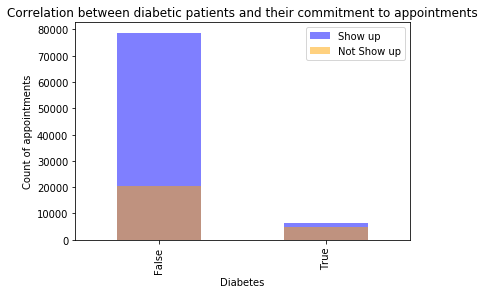

In [162]:
#Use groupby to test the correlation between the disease status and commitment to appointments
#first check diabetes condition
df.Diabetes[Showed].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Show up')
df.Diabetes[Not_showed].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='Not Show up')
plt.title("Correlation between diabetic patients and their commitment to appointments")
plt.xlabel('Diabetes')
plt.ylabel('Count of appointments')
plt.legend();

### From the above graph, we found that the majority of patients who showed up at their appointments were nondiabetic. That might owe to diabetes is a chronic disease that does not need regular visits to clinics since the case is already diagnosed and the therapeutic protocol is well-defined.

In [163]:
#grouping patients in terms of showing up according to hypertension condition.
df.groupby('Hypertension').No_show.value_counts()

Hypertension  No_show
False         False      67278
              True       17908
True          False      18029
              True        7312
Name: No_show, dtype: int64

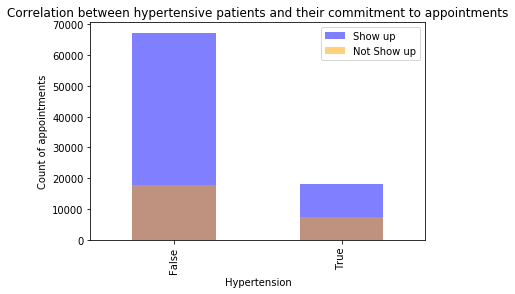

In [164]:
#Use groupby to test the correlation between the disease status and commitment to appointments
#first check hypertension condition
df.Hypertension[Showed].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Show up')
df.Hypertension[Not_showed].value_counts().plot(kind='bar', alpha=0.5, color='orange', label='Not Show up')
plt.title("Correlation between hypertensive patients and their commitment to appointments")
plt.xlabel('Hypertension')
plt.ylabel('Count of appointments')
plt.legend();

### From the above graph, we found that the majority of patients who showed up at their appointments were not hypertensive same as in diabetes category. However, there is a considerable number of hypertensive patients who committed to their appointments.

### Research question 6. investigate whether the handicapped patients are more likely to commit to their appointments or not.

In [165]:
df.groupby('Handicap-merge')['No_show'].value_counts()

Handicap-merge  No_show
False           False      83474
                True       21273
True            True        3947
                False       1833
Name: No_show, dtype: int64

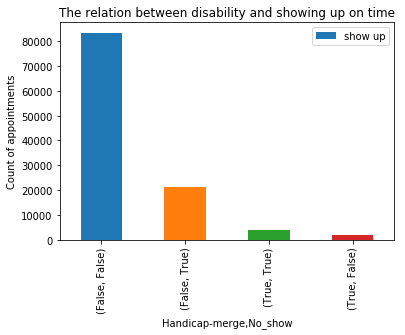

In [166]:
#group patients in terms of commitments to appointments according to being handicapped or not
df.groupby('Handicap-merge')['No_show'].value_counts().plot(kind='bar', label= 'show up')
plt.ylabel("Count of appointments")
plt.title("The relation between disability and showing up on time")
plt.legend();

### We noticed that the majority of patients who show up at their appointments are not handicapped. However, the count of handicapped patients who commit to their appointments is approximately double those who do not.

### Research question 7. check whether sms-received affect showing up at the scheduled appointments.

In [167]:
df.groupby('SMS_received')['No_show'].value_counts()

SMS_received  No_show
False         False      60290
              True       12112
True          False      25017
              True       13108
Name: No_show, dtype: int64

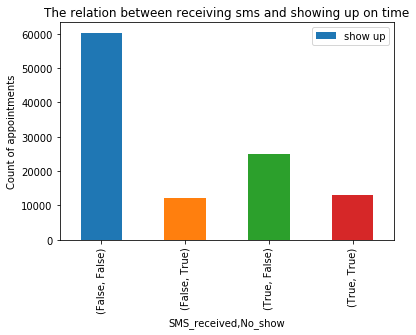

In [168]:
#group patients in terms of commitments to appointments according to receiving sms or not
df.groupby('SMS_received')['No_show'].value_counts().plot(kind='bar', label= 'show up')
plt.ylabel("Count of appointments")
plt.title("The relation between receiving sms and showing up on time")
plt.legend();

### Interestingly, most of patients who show up did not recieve sms. However, a large group of patients accounting for approx. 25,000 patients recieved sms and committed.

### Research question 8. investigate whether patients who show up on time are on a welfare health program or not.

In [169]:
#group patients in terms of commitments to appointments according to having a scholarship or not
df.groupby('Scholarship')['No_show'].value_counts()

Scholarship  No_show
False        False      77069
             True       19109
True         False       8238
             True        6111
Name: No_show, dtype: int64

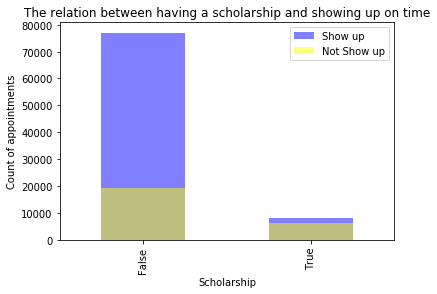

In [170]:
#check whether being enrolled into a welfare health program affect commitment to appointments
df.Scholarship[Showed].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Show up')
df.Scholarship[Not_showed].value_counts().plot(kind='bar', alpha=0.5, color='yellow', label='Not Show up')
plt.xlabel('Scholarship')
plt.ylabel('Count of appointments')
plt.title("The relation between having a scholarship and showing up on time")
plt.legend();

### Most of patients who show up at their appointments are not enrolled into a welfare health program. However, the majority of patients do not have a scholarship from government.

### Research question 9. check which week day the patients do not commit to their hospital appointments.

In [171]:
df.groupby('Appointment_dw')['No_show'].value_counts()

Appointment_dw  No_show
Friday          False      14525
                True        3940
Monday          False      17388
                True        4515
Saturday        False         30
                True           9
Thursday        False      13415
                True        6784
Tuesday         False      19807
                True        5024
Wednesday       False      20142
                True        4948
Name: No_show, dtype: int64

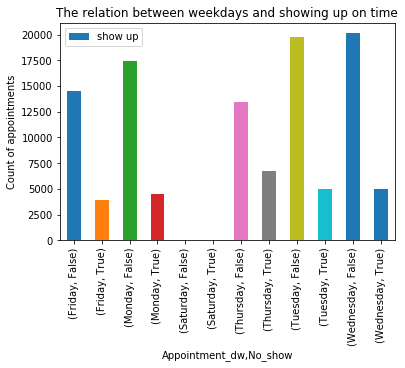

In [172]:
#group patients in terms of commitments to appointments according to weekdays
df.groupby('Appointment_dw')['No_show'].value_counts().plot(kind='bar', label= 'show up')
plt.ylabel("Count of appointments")
plt.title("The relation between weekdays and showing up on time")
plt.legend();

### From the graph, we could deduce that the peak days of showing up at appointments are Wednesdays, Tuesdays and Mondays which are the mid days of the week. Furthermore, on Saturdays, patients rarely visit clinics regardless they have appointments or not since it is a weekend.

<a id='conclusions'></a>
## Conclusions
From the above data analyses, we conclude that the majority of patients show up at their appointments accounting for 77.2% of the total registered patients, and the age factor does not affect the degree of commitment to the appointments. However, illogical values of the age for thousands of entries that have been fixed by filling in the average age instead is a major limitation of the analysis that probably influences the accuracy of findings regarding the age factor. Furthermore, most of patients who show up at their appointments are females. However, female patients constitue approximately two thirds of the total patients. Also, the majority of patients who show up on time are non-diabetic, non-hypertensive, non-alcoholic, and unhandicapped who in total constitute the majority of registered patients. In addition, most patients who show up at their appointments are not enrolled into the governmental welfare health program and astonishingly, do not recieve sms. Eventually, commitment to hospital appointments is observed during the mid days of the week which is expected. 

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [173]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0